In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Get batches from a list
def chunker(seq, size):
    return (seq[pos:pos + size] for pos in range(0, len(seq), size))

In [3]:
# Paths

# SED folder path
SED_path = './../../../wf-psf/data/SEDs/save_SEDs/'
# Output saving path (in node05 of candide)
output_folder = './../../../../../n05data/ecentofanti/WFE_sampling_test/multires_dataset/'


In [4]:
# Load the SEDs
stellar_SEDs = np.load(SED_path + 'SEDs.npy', allow_pickle=True)
stellar_lambdas = np.load(SED_path + 'lambdas.npy', allow_pickle=True)

SED_name = ['O5V', 'B0V', 'B5-7V', 'A0V', 'A5V', 'F0V', 'F5V', 'G0V', 'G5V', 'K0V', 'K5V', 'M0V', 'M5V']

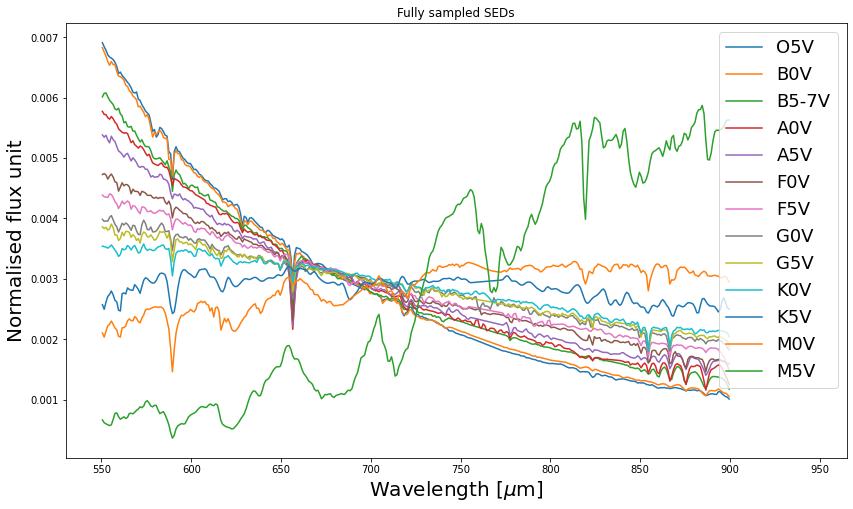

In [5]:
plt.figure(figsize=(14,8))

for idx in range(stellar_SEDs.shape[0]):
    plt.plot(stellar_lambdas, stellar_SEDs[idx,:], label=SED_name[idx])

ax = plt.gca()
plt.legend(fontsize=18,loc='upper right')
plt.title('Fully sampled SEDs')
plt.xlabel(r'Wavelength [$\mu$m]', fontsize=20)
plt.ylabel('Normalised flux unit', fontsize=20)
ax.set_xlim([530, 965])

plt.show()
    

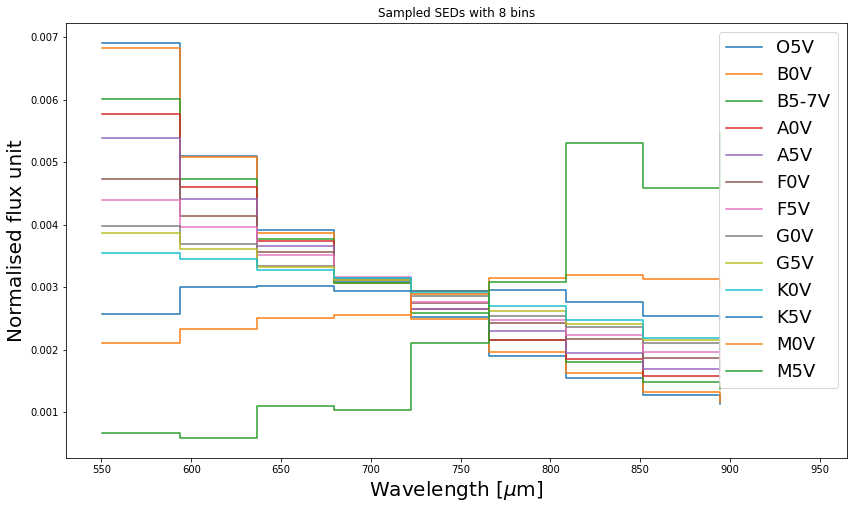

In [85]:
plt.figure(figsize=(14,8))

n_bins = 8
step = int(stellar_SEDs.shape[1]/(n_bins))
for idx in range(stellar_SEDs.shape[0]):
    plt.step(stellar_lambdas[0:-1:step], stellar_SEDs[idx,0:-1:step],where='post', label=SED_name[idx])

ax = plt.gca()
plt.legend(fontsize=18,loc='upper right')
plt.title('Sampled SEDs with {n_bins} bins'.format(n_bins=n_bins))
plt.xlabel(r'Wavelength [$\mu$m]', fontsize=20)
plt.ylabel('Normalised flux unit', fontsize=20)
ax.set_xlim([530, 965])
plt.show()

In [87]:
# Average SEDs throughout each wavelenght bin
n_bins = 8
step = int(np.ceil(stellar_SEDs.shape[1]/(n_bins)))

# New SEDs with only n_bins points
stellar_SEDs_filt = np.zeros((stellar_SEDs.shape[0], n_bins))

for idx in range(stellar_SEDs.shape[0]):
    i = 0
    for band in chunker(stellar_SEDs[idx,:], step):
        stellar_SEDs_filt[idx,i] = np.average(band)
        i = i+1

stellar_lambdas_filt = np.linspace(stellar_lambdas[int(step/2)],stellar_lambdas[int(-step/2)], n_bins)

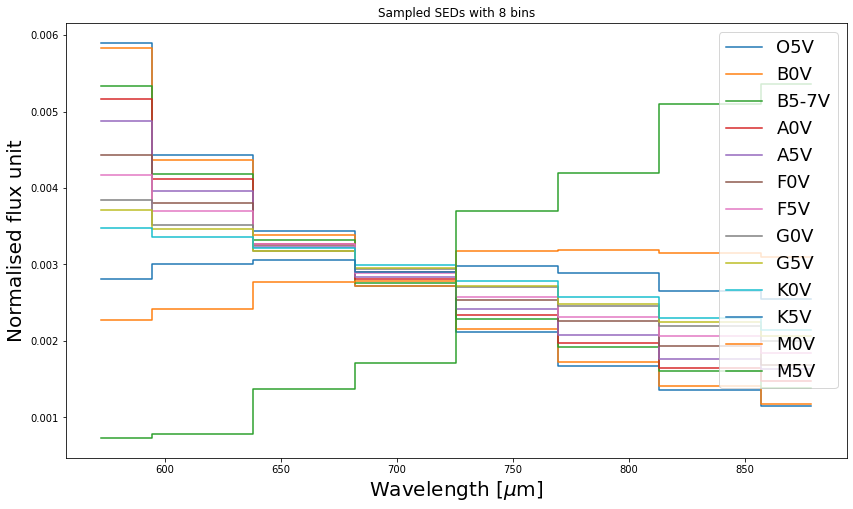

In [88]:
plt.figure(figsize=(14,8))

for idx in range(stellar_SEDs_filt.shape[0]):
    plt.step(stellar_lambdas_filt,stellar_SEDs_filt[idx,:], where='mid', label=SED_name[idx])

ax = plt.gca()
plt.legend(fontsize=18,loc='upper right')
plt.title('Sampled SEDs with {n_bins} bins'.format(n_bins=n_bins))
plt.xlabel(r'Wavelength [$\mu$m]', fontsize=20)
plt.ylabel('Normalised flux unit', fontsize=20)
plt.show()